## Title:

Assessment of the Indian Start-Up Ecosystem


# Introduction

## General:
India has emerged as one of the fastest-growing startup ecosystems in the world, attracting significant investment in various sectors.The India startup funding dataset typically contains information on startup names, industry sectors, funding rounds, funding amounts, investor names, and funding dates


## Questions:
1.	Which start-ups are found in the capital of India?
2.	Which start-ups are into Information technologies related business?
3.	which industry got most of the start-up funding and why did they get such an amount?
4.	Which industry got the least of the start-up funding. What may be the reason?
5.	Which year recorded the most companies being formed
6.	Which sectors receive most funding from investors?
7.	Which stage do the start-ups receive more funding from investors?
8.	What are the different types of funding for startups and What are the regular funding types in the indian ecosystem? 
9.	Which start-ups were most attractive to investors
10.	How does the location of cities affect funding for start-ups?

## Hypothesis:

Null- Funding to start-ups in India has not changed over time.
Alternate- Funding to start-ups has changed over time



In [1]:
import pandas as pd
import numpy as np

In [2]:
# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Other supporting libraries
import re
import warnings
# Hiding the warnings
warnings.filterwarnings('ignore')

In [4]:
data_2018 = pd.read_csv("Funding_CSV_Files\startup_funding2018.csv") # for the 2018 startup data
data_2019 =  pd.read_csv("Funding_CSV_Files\startup_funding2019.csv") # for the 2019 startup data
data_2020 = pd.read_csv("Funding_CSV_Files\startup_funding2020.csv") # for the 2020 startup data
data_2021 =  pd.read_csv("Funding_CSV_Files\startup_funding2021.csv") # for the 2021 startup data

In [5]:
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [6]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [7]:
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [8]:
data_2021 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [9]:
#Processing 2018 Data

In [10]:
# Selecting the main industries of the startups as Industry
data_2018['Industry'] = data_2018['Industry'].apply(str)
data_2018['Industry'] = data_2018['Industry'].str.split(',').str[0]
data_2018['Industry'] = data_2018['Industry'].replace("'", "", regex=True)

In [11]:
# Selecting the main locations of the startups as Location
data_2018['Location'] = data_2018['Location'].apply(str)
data_2018['Location'] = data_2018['Location'].str.split(',').str[0]
data_2018['Location'] = data_2018['Location'].replace("'", "", regex=True)

In [12]:
# Removing the commas and dashes from the Amounts
data_2018['Amount'] = data_2018['Amount'].apply(str)
data_2018['Amount'].replace(",", "", inplace = True, regex=True)
data_2018['Amount'].replace("—", 0, inplace = True, regex=True)
data_2018['Amount'].replace("$", "", inplace = True, regex=True)

In [13]:
## Creating temporary columns to help with the conversion of INR to USD
data_2018['INR Amount'] = data_2018['Amount'].str.rsplit('₹', n = 2).str[1]
data_2018['INR Amount'] = data_2018['INR Amount'].apply(float).fillna(0)
data_2018['USD Amount'] = data_2018['INR Amount'] * 0.012
data_2018['USD Amount'] = data_2018['USD Amount'].replace(0, np.nan)
data_2018['USD Amount'] = data_2018['USD Amount'].fillna(data_2018['Amount'])
data_2018['USD Amount'] = data_2018['USD Amount'].replace("$", "", regex=True)
data_2018["Amount"] = data_2018["USD Amount"]
data_2018["Amount"] = data_2018["Amount"].apply(lambda x: float(str(x).replace("$","")))
data_2018["Amount"] = data_2018["Amount"].replace(0, np.nan)

In [14]:
# Dropping the temporary columns
data_2018.drop(columns = ["INR Amount", "USD Amount"], inplace = True)

In [15]:
# Adding a column to represent the year of funding
data_2018["Year of Funding"] = "2018"

In [16]:
print(data_2018.info())
data_2018

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     526 non-null    object 
 1   Industry         526 non-null    object 
 2   Round/Series     526 non-null    object 
 3   Amount           378 non-null    float64
 4   Location         526 non-null    object 
 5   About Company    526 non-null    object 
 6   Year of Funding  526 non-null    object 
dtypes: float64(1), object(6)
memory usage: 28.9+ KB
None


,Company Name,Industry,Round/Series,Amount,Location,About Company,Year of Funding
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,420000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [17]:
#----------------- End of cleaning of 2018 csv file--------------

In [18]:
# Processing 2019 data

In [19]:
print(data_2019.info(), "\n")
data_2019

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [20]:
# Converting the Founded column to a string
data_2019['Founded'] = data_2019['Founded'].apply(str)

In [21]:
# Removing the commas and dashes from the Amounts
data_2019["Amount($)"] = data_2019["Amount($)"].apply(str)
data_2019["Amount($)"].replace(",", "", inplace = True, regex=True)

In [22]:
#Removing or replacing undisclosed 
data_2019["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)

In [23]:
#Removing $
data_2019["Amount($)"] = data_2019["Amount($)"].apply(lambda x: float(str(x).replace("$","")))
data_2019["Founded"].replace("nan", np.nan, inplace = True, regex=True)

In [24]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN


In [25]:
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)        12
Stage            46
dtype: int64

In [26]:
# Appending years of funding to the respective dataframes
data_2019["Year of Funding"] = "2019"

In [27]:
#Processing the 2020 DataFrame
print(data_2020.info(), "\n")
data_2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [28]:
# Dropping the extra column in the 2020 DataFrame
data_2020 = data_2020.iloc[: , :-1]
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C


In [29]:
# Selecting the first value as Headquarters
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].apply(str)
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.split(',').str[0]
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace("'", "", regex=True)

In [30]:
# Removing the commas, dashes and Undisclosed from the Amounts
data_2020["Amount($)"] = data_2020["Amount($)"].apply(str)
data_2020["Amount($)"].replace(",", "", inplace = True, regex=True)
data_2020["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2020["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [31]:
# Removing the $ signs and converting the Amount column to float
data_2020["Amount($)"] = data_2020["Amount($)"].apply(lambda x: str(x).replace("$",""))

In [32]:
# Appending years of funding to the respective dataframes
data_2020["Year of Funding"] = "2020"

In [33]:
#Processing the 2021 DataFrame
print(data_2021.info(), "\n")
data_2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [34]:
# Converting the Founded column to a string
data_2021['Founded'] = data_2021['Founded'].apply(str)
data_2021["Founded"].replace("nan", np.nan, inplace = True, regex=True)

In [35]:
# Removing the commas,dashes and undisclosed from the Amounts
data_2021["Amount($)"] = data_2021["Amount($)"].apply(str)
data_2021["Amount($)"].replace(",", "", inplace = True, regex=True)
data_2021["Amount($)"].replace("Undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("undisclosed", np.nan, inplace = True, regex=True)
data_2021["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [36]:
# FanPlay has duplicated, and has wrongly placed amounts.
data_2021.drop([98], axis = 0, inplace = True)

data_2021.loc[data_2021["Company/Brand"] == "FanPlay", ["Amount($)", "Stage", "Investor"]] = [1200000, "Series A", "Upsparks"]
data_2021.loc[data_2021["Company/Brand"] == "FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,1200000,Series A


In [37]:
# The entries both represent Series C funding raised in 2021. One has to be deleted.
data_2021.loc[data_2021["Company/Brand"] == "Fullife Healthcare", ["Amount($)", "Stage", "Investor"]] = [22000000, "Series C", "Morgan Stanley Private Equity Asia"]
data_2021.drop([256], axis = 0, inplace = True)
data_2021.loc[data_2021["Company/Brand"] == "Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,Morgan Stanley Private Equity Asia,22000000,Series C


In [38]:
# another error convert Amount to a float, this time by an entry "Seed"
data_2021.loc[data_2021["Amount($)"] == "Seed"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,NaN


In [39]:
# Correcting for MoEVing
data_2021.loc[data_2021["Company/Brand"] == "MoEVing", ["Amount($)", "Stage", "Investor"]] = [5000000, "Seed", np.nan]

In [40]:
# Correcting for Godamwale
data_2021.loc[data_2021["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = [1000000, "Seed", "Anand Aryamane"]

In [41]:
# A similar error by an entry "ah! Ventures", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "ah! Ventures"]
data_2021.loc[data_2021["Company/Brand"] == "Little Leap", ["Amount($)", "Stage", "Investor"]] = [int(26700000/73.9339), "Seed", "ah! Ventures"]
data_2021.loc[data_2021["Company/Brand"] == "Little Leap"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah! Ventures,361133,Seed


In [42]:
# A similar error by an entry "Pre-series A", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "Pre-series A"]

data_2021.loc[data_2021["Company/Brand"] == "AdmitKard", ["Amount($)", "Stage", "Investor"]] = [int(26700000/73.9339), "Pre-series A", np.nan]
data_2021.loc[data_2021["Company/Brand"] == "AdmitKard"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,361133,Pre-series A


In [43]:
# A similar error by an entry "ITO Angel Network LetsVenture", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "ITO Angel Network LetsVenture"]

data_2021.loc[data_2021["Amount($)"] == "ITO Angel Network LetsVenture", ["Amount($)", "Stage", "Investor"]] = [300000, "Angel", "ITO Angel Network LetsVenture"]
data_2021.loc[data_2021["Company/Brand"] == "BHyve"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,ITO Angel Network LetsVenture,300000,Angel


In [44]:
# A similar error by an entry "ITO Angel Network LetsVenture", which has to be checked and corrected
data_2021.loc[data_2021["Amount($)"] == "JITO Angel Network LetsVenture"]

data_2021.loc[data_2021["Amount($)"] == "JITO Angel Network LetsVenture", ["Amount($)", "Stage"]] = [1000000, "Seed"]
data_2021.loc[data_2021["Company/Brand"] == "Saarthi Pedagogy"]
data_2021.loc[data_2021["Stage"] == "$6000000"]

data_2021.loc[data_2021["Stage"] == "$6000000", ["Amount($)", "Stage"]] = [9627286, "Venture"]
data_2021.loc[data_2021["Company/Brand"] == "MYRE Capital"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,9627286,Venture


In [45]:
data_2021["Amount($)"].replace('', 0, inplace = True, regex=True)
data_2021["Amount($)"] = data_2021["Amount($)"].apply(lambda x: str(x).replace("$",""))
data_2021["Amount($)"].replace('nan', 0, inplace = True, regex=True)
data_2021["Amount($)"] = pd.to_numeric(data_2021["Amount($)"])
data_2021["Amount($)"] = data_2021["Amount($)"].apply(float)

In [46]:
# Appending years of funding to the respective dataframes
data_2021["Year of Funding"] = "2021"

In [47]:
#we have to Joine the DataFrames which has similar column names
combined_19_21 = pd.concat([data_2019, data_2020, data_2021], ignore_index = True)
combined_19_21.columns = ["Company Name", "Year Founded", "Headquarters", "Sector", "Description", "Founders", "Investors", "Amount", "Funding Stage", "Funding Year"]
combined_19_21

,Company Name,Year Founded,Headquarters,Sector,Description,Founders,Investors,Amount,Funding Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
2346,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
2347,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
2348,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
2349,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [48]:
# there are columns in the 2018 dataframe rename to match with the other dataframes
data_2018.columns = ['Company Name', 'Sector', 'Funding Stage', 'Amount', 'Headquarters', 'Description', "Funding Year"]
data_2018

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000.0,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,NaN,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500.0,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,420000.0,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [49]:
# Joining the 2018 DataFrame to the 2019-2021 DataFrame
complete_set = pd.concat([data_2018, combined_19_21], ignore_index = True)
print(complete_set.info(), "\n")
complete_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   2877 non-null   object
 1   Sector         2859 non-null   object
 2   Funding Stage  1944 non-null   object
 3   Amount         2715 non-null   object
 4   Headquarters   2857 non-null   object
 5   Description    2877 non-null   object
 6   Funding Year   2877 non-null   object
 7   Year Founded   2109 non-null   object
 8   Founders       2332 non-null   object
 9   Investors      2249 non-null   object
dtypes: object(10)
memory usage: 224.9+ KB
None 



,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2872,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2873,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2874,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2875,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [50]:
# Converting various columns into appropriate formats
complete_set['Amount'] = complete_set['Amount'].replace(np.nan, 0)
complete_set['Amount'] = complete_set['Amount'].apply(str)
complete_set["Funding Year"] = complete_set["Funding Year"].apply(str)
complete_set["Year Founded"] = complete_set["Year Founded"].apply(str)

In [51]:
# Dropping all duplicates from the combined DataFrame
complete_set.drop_duplicates(inplace = True)
complete_set.reset_index(drop=True, inplace = True)


In [52]:
# final  Complete Set
print(complete_set.nunique(), "\n")
complete_set

Company Name     2214
Sector            595
Funding Stage      72
Amount            623
Headquarters      134
Description      2691
Funding Year        4
Year Founded       58
Founders         1980
Investors        1772
dtype: int64 



,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,nan,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,480000.0,Mumbai,A startup which aggregates milk from dairy far...,2018,nan,NaN,NaN
2,MyLoanCare,Credit,Series A,780000.0,Gurgaon,Leading Online Loans Marketplace in India,2018,nan,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,nan,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2851,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2852,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2853,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2854,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [53]:
# Exporting to the DataFrame in Excel
complete_set.to_csv("complete_set.csv", index = False)

In [54]:
#Checking the integrity of the combined DataFrame
#Company Name

In [55]:
unique_companies = (complete_set.loc[:,"Company Name"]).value_counts()
unique_companies

BharatPe                        10
Zomato                           7
MPL                              6
Nykaa                            6
Zetwerk                          6
                                ..
Genrobotics                      1
Reliance Retail Ventures Ltd     1
Chargebee                        1
Credit Wise Capital              1
WeRize                           1
Name: Company Name, Length: 2214, dtype: int64

In [56]:
# Capitalizing only the first letters of each entry in the column for normalization
complete_set["Company Name"] = complete_set["Company Name"].apply(lambda x: str(x).capitalize())

In [57]:
# Correcting the misspelt names of startups
complete_set.loc[complete_set["Company Name"] == "Byju", "Company Name"] = "Byju's"

In [58]:
# Reassigning the dataframe and previewing it
unique_companies = (complete_set.loc[:,"Company Name"]).value_counts()
unique_companies.head(10)

Byju's      10
Bharatpe    10
Zomato       7
Nykaa        6
Trell        6
Zetwerk      6
Vedantu      6
Oyo          6
Mpl          6
Spinny       6
Name: Company Name, dtype: int64

<Axes: >

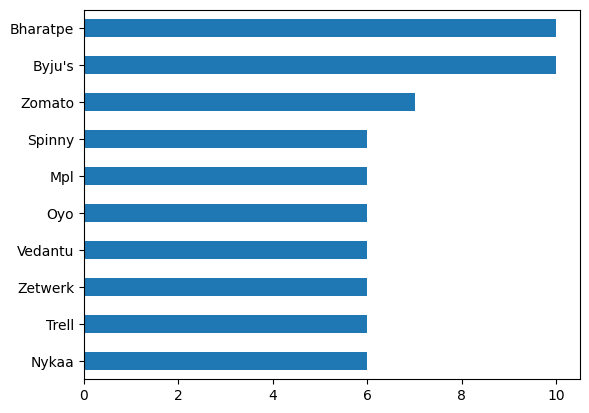

In [59]:
#visualizing companies
unique_companies.head(10).sort_values().plot.barh()

In [60]:
# fro Sectors
unique_sectors = (complete_set.loc[:,"Sector"]).value_counts()
unique_sectors

FinTech                             174
EdTech                              147
Financial Services                   86
Fintech                              85
Edtech                               74
                                   ... 
Startup laboratory                    1
Online credit management startup      1
Battery design                        1
Eyeglasses                            1
Staffing & Recruiting                 1
Name: Sector, Length: 595, dtype: int64

In [61]:
# Equating similar entries in the Sector column for ease of analysis
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace(" and ", " & "))
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace("startup", ""))
complete_set["Sector"] = complete_set["Sector"].apply(lambda x: str(x).replace("  ", " "))
complete_set.loc[complete_set["Sector"] == "nan", "Sector"] = "Sector TBD"
complete_set.loc[complete_set["Sector"] == "â€”", "Sector"] = "Sector TBD"

In [62]:
unique_sectors = (complete_set.loc[:,"Sector"]).value_counts()
unique_sectors.head(10)

FinTech               174
EdTech                147
Financial Services     86
Fintech                85
Edtech                 74
E-commerce             73
Automotive             53
AgriTech               43
Food & Beverages       41
Logistics              37
Name: Sector, dtype: int64

Text(0.5, 1.0, 'Funding Deals for Sector')

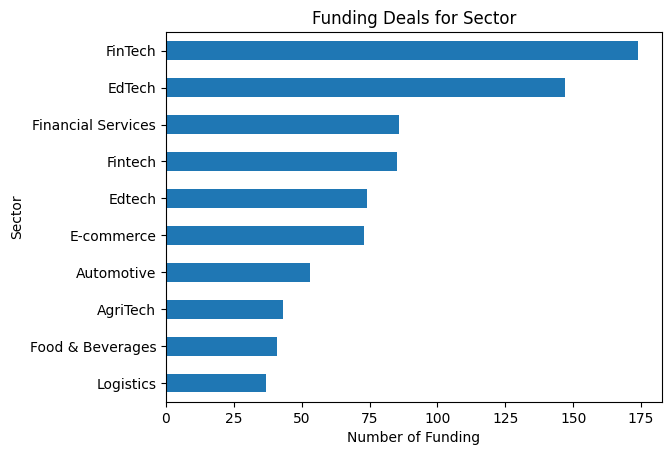

In [63]:
#visualization of sectors per number of funding deals 
unique_sectors.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding")
plt.ylabel("Sector")
plt.title("Funding Deals for Sector")

In [64]:
#Funding Stage
unique_stages = (complete_set.loc[:,"Funding Stage"]).value_counts()
unique_stages.head(15)

Seed                        603
Series A                    305
Pre-series A                209
Series B                    134
Series C                    114
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     50
Debt                         45
Angel                        38
Venture - Series Unknown     37
Series E                     29
Pre-series B                 14
Debt Financing               13
Name: Funding Stage, dtype: int64

Text(0.5, 1.0, 'Funding Deals per Funding Stage')

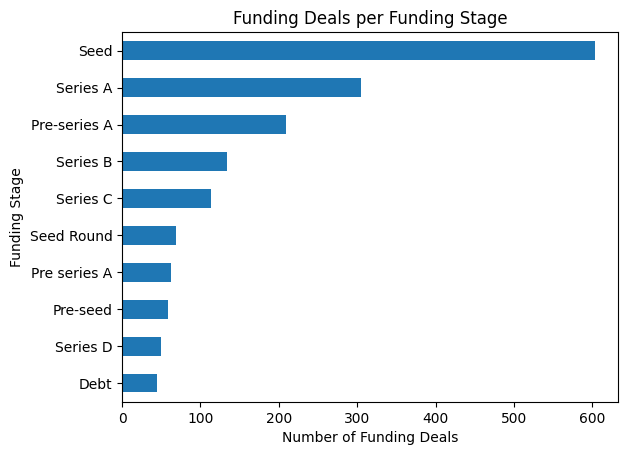

In [65]:
#Visualisation of Numbers of funding deal wiht funding stage
unique_stages = (complete_set.loc[:,"Funding Stage"]).value_counts()
unique_stages.head(10).sort_values().plot.barh()
plt.xlabel("Number of Funding Deals")
plt.ylabel("Funding Stage")
plt.title("Funding Deals per Funding Stage")

In [66]:
# same for Amount
unique_amounts = (complete_set.loc[:,"Amount"]).value_counts()
unique_amounts

nan                245
0                  162
0.0                139
1000000.0          116
2000000.0           77
                  ... 
764000               1
887000 23000000      1
2110000              1
1080000              1
55000000.0           1
Name: Amount, Length: 623, dtype: int64

In [67]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [68]:
# Replacing all Nulls with zero
complete_set.loc[complete_set["Amount"] == "nan", "Amount"] = np.nan
complete_set["Amount"].fillna(0.00,inplace = True)

In [69]:
#a copy of the DataFrame sorted by Amount
amt_sorting = (complete_set.loc[complete_set["Amount"] != 0]).round(2).sort_values(by = "Amount")
amt_sorting

,Company Name,Sector,Funding Stage,Amount,Headquarters,Description,Funding Year,Year Founded,Founders,Investors
1159,Bulbul,Social commerce,NaN,8700000,Gurgaon,A video and livestream led commerce platform t...,2020,2018,"Sachin Bhatia, Atit Jain",Info Edge
96,Khidki,Artificial Intelligence,Seed,0,Bangalore,Vernacular Social Network Focused on Town Leve...,2018,nan,NaN,NaN
110,Stones2milestones,E-Learning,Seed,0,Gurgaon,Stones2milestones is a Gurgaon Based Learning ...,2018,nan,NaN,NaN
111,Generico,Health Care,Series A,0,Mumbai,Generico is the fastest growing specialized ph...,2018,nan,NaN,NaN
112,Adiuvo diagnostics,Health Diagnostics,Seed,0,Chennai,Adiuvo Diagnostics is a medical diagnostic dev...,2018,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1579,Wizklub,Edtech,Seed Funding,982530,Bangalore,Helps students solve problems at complex level,2020,2018,Amit Bansal,Incubate Fund India
1567,1mg,Healthtech,NaN,9900000,Gurugram,Online pharmacy,2020,2015,"Prashant Tandon, Gaurav Agarwal, Vikas Chauhan",Bill & Melinda Gates Foundation
481,Sharechat,Internet,Series C,99230000.0,Bangalore,ShareChat is a social networking and regional ...,2018,nan,NaN,NaN
1276,Credgencies,AI & Debt,Seed Round,Undiclsosed,nan,Tech-enabled platform for resolution of non-pe...,2020,2018,"Rishabh Goel, Anand Agrawal, Mayank Khera",Titan Capital


In [73]:
# Creating a function to find outliers using IQR
def outliers_using_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [77]:
#Chec Outliers
outliers = outliers_using_IQR(complete_set["Amount"])
print("Number of outliers: " + str(len(outliers)), "\n")
print("Outliers percentage of total: " + str((((len(outliers))/len(complete_set["Amount"])*100))) + "%", "\n")
print("Max outlier value: " + str(outliers.max()), "\n")
print("Min outlier value: " + str(outliers.min()), "\n")

TypeError: '<' not supported between instances of 'float' and 'str'